<a href="https://colab.research.google.com/github/SukanyaMukherjee2000/MallCustomerSegmentation/blob/main/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data.rename(columns = {'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace=True)


In [6]:
%matplotlib inline

data_short=data[['Spending_Score', 'Income']]

In [7]:
import sklearn.cluster as cluster

In [8]:
K=range(1,12)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(data_short)
    wss_iter=kmeans.inertia_
    wss.append(wss_iter)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [9]:
mycenters = pd.DataFrame({'Clusters':K, 'WSS':wss})
mycenters

,Clusters,WSS
0,1,269981.280000
1,2,181363.595960
2,3,106348.373062
3,4,73679.789039
4,5,44448.455448
5,6,37265.865205
6,7,31644.319038
7,8,24995.969781
8,9,21916.794790
9,10,19704.123543


<Axes: xlabel='Clusters', ylabel='WSS'>

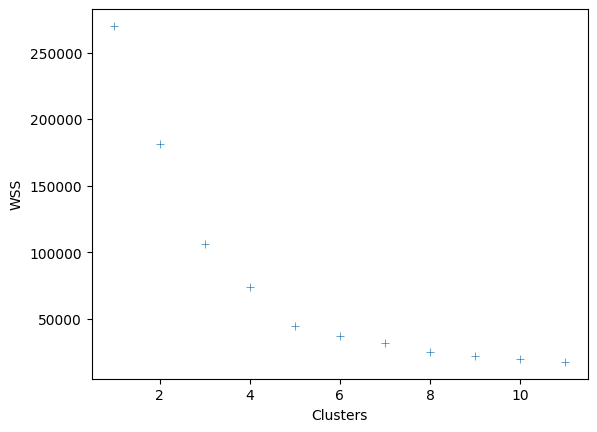

In [10]:
sns.scatterplot(x='Clusters', y='WSS', data=mycenters, marker="+")

In [11]:
import sklearn.metrics as metrics

In [12]:
kmeans=cluster.KMeans(n_clusters=5,init="k-means++")
kmeans=kmeans.fit(data[['Spending_Score', 'Income']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
data['Clusters'] = kmeans.labels_

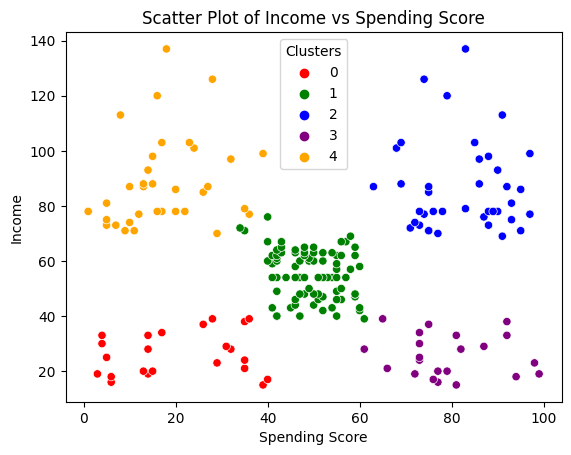

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
custom_colors = ["red", "green", "blue", "purple", "orange"]

# Create the scatter plot with the custom color palette
sns.scatterplot(x="Spending_Score", y="Income", hue="Clusters", data=data, palette=custom_colors)

# Modify the plot with labels and headings
plt.title("Scatter Plot of Income vs Spending Score")
plt.xlabel("Spending Score")
plt.ylabel("Income")

# Customize the legend
plt.legend(title="Clusters", loc='best')

# Show the plot
plt.show()
